In [1]:
import h5py,pandas as pd, numpy as np
import os.path
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from tensorflow import keras
from tensorflow.keras import layers
import itertools
import matplotlib.pyplot as plt

Aquisition des données pour utilisation dans Jupyter (local)

In [2]:
from data import dataread, datatreat_A1
from models import cnn_1, cnn_4, cnn_5
from test import test_1
from tools import save_model, save_results, plot_loss_acc_history, loss_generator

In [3]:
X, y, X_final = dataread()

In [4]:
epochs=150
batch_size=70
validation_split=0.1

In [5]:
X_train, X_test, y_train, y_test, prop_HF = datatreat_A1(X, y, train_size=0.8, Shuffle=True, preprocess=None, ratio="base", balancing_method="remove")

La proportion H/F des données d'entraînement est de 3.526946107784431
L'échantillon de training comporte 30240 frames


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 500, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 250, 100)       0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 250, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 250, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 125, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 125, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 125, 300)       1

389/389 [==============================] - 28s 72ms/step - loss: 1.0680 - accuracy: 0.5202 - AUC: 0.5824 - val_loss: 1.0792 - val_accuracy: 0.6597 - val_AUC: 0.5484
Epoch 33/150
389/389 [==============================] - 28s 72ms/step - loss: 1.0617 - accuracy: 0.5394 - AUC: 0.5828 - val_loss: 1.1229 - val_accuracy: 0.6746 - val_AUC: 0.5305
Epoch 34/150
389/389 [==============================] - 28s 72ms/step - loss: 1.0559 - accuracy: 0.5236 - AUC: 0.5957 - val_loss: 1.0931 - val_accuracy: 0.6925 - val_AUC: 0.5719
Epoch 35/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0631 - accuracy: 0.5151 - AUC: 0.5972 - val_loss: 1.1058 - val_accuracy: 0.7087 - val_AUC: 0.5509
Epoch 36/150
389/389 [==============================] - 28s 72ms/step - loss: 1.0549 - accuracy: 0.5348 - AUC: 0.5935 - val_loss: 1.0920 - val_accuracy: 0.7054 - val_AUC: 0.5527
Epoch 37/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0625 - accuracy: 0.5379 - AUC: 0.5913 - val

389/389 [==============================] - 28s 72ms/step - loss: 1.2730 - accuracy: 0.6443 - AUC: 0.7470 - val_loss: 1.2691 - val_accuracy: 0.6644 - val_AUC: 0.5838
Epoch 79/150
389/389 [==============================] - 28s 72ms/step - loss: 0.9015 - accuracy: 0.6550 - AUC: 0.7591 - val_loss: 1.3186 - val_accuracy: 0.6713 - val_AUC: 0.5898
Epoch 80/150
389/389 [==============================] - 28s 72ms/step - loss: 0.8713 - accuracy: 0.6694 - AUC: 0.7787 - val_loss: 1.2639 - val_accuracy: 0.6481 - val_AUC: 0.5916
Epoch 81/150
389/389 [==============================] - 28s 72ms/step - loss: 0.8713 - accuracy: 0.6758 - AUC: 0.7852 - val_loss: 1.3831 - val_accuracy: 0.6627 - val_AUC: 0.5955
Epoch 82/150
389/389 [==============================] - 28s 71ms/step - loss: 0.8331 - accuracy: 0.7006 - AUC: 0.8014 - val_loss: 1.6386 - val_accuracy: 0.6872 - val_AUC: 0.6011
Epoch 83/150
389/389 [==============================] - 28s 71ms/step - loss: 0.8034 - accuracy: 0.7099 - AUC: 0.8217 - val

Epoch 124/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1907 - accuracy: 0.9580 - AUC: 0.9932 - val_loss: 6.2038 - val_accuracy: 0.7136 - val_AUC: 0.5522
Epoch 125/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1842 - accuracy: 0.9510 - AUC: 0.9916 - val_loss: 5.2683 - val_accuracy: 0.7011 - val_AUC: 0.5565
Epoch 126/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1686 - accuracy: 0.9601 - AUC: 0.9940 - val_loss: 6.6501 - val_accuracy: 0.7222 - val_AUC: 0.5522
Epoch 127/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1393 - accuracy: 0.9617 - AUC: 0.9954 - val_loss: 4.8087 - val_accuracy: 0.7087 - val_AUC: 0.5623
Epoch 128/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1385 - accuracy: 0.9614 - AUC: 0.9949 - val_loss: 5.7200 - val_accuracy: 0.7136 - val_AUC: 0.5457
Epoch 129/150
389/389 [==============================] - 28s 72ms/step - loss: 0.1291 - accuracy: 0.9652 

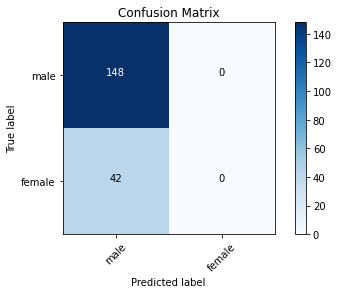

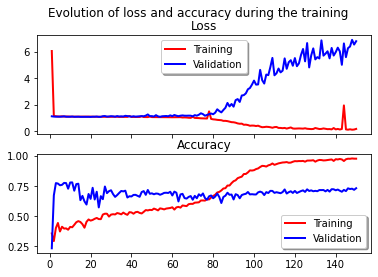

In [6]:
id='cnn_1_none_CL'
model = cnn_1(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 None CL', 'cnn_1', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 500, 25)        275       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 500, 25)        4375      
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 500, 25)        100       
_________________________________________________________________
activation (Activation)      (None, 7, 500, 25)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 167, 25)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 167, 25)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 167, 50)       

Epoch 29/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0872 - accuracy: 0.5784 - AUC: 0.5784 - val_loss: 1.1094 - val_accuracy: 0.2837 - val_AUC: 0.5818
Epoch 30/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0820 - accuracy: 0.5514 - AUC: 0.5796 - val_loss: 1.5442 - val_accuracy: 0.4560 - val_AUC: 0.5916
Epoch 31/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0752 - accuracy: 0.5871 - AUC: 0.5923 - val_loss: 1.1112 - val_accuracy: 0.3456 - val_AUC: 0.5906
Epoch 32/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0827 - accuracy: 0.5672 - AUC: 0.5962 - val_loss: 1.2139 - val_accuracy: 0.5866 - val_AUC: 0.5915
Epoch 33/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0629 - accuracy: 0.5482 - AUC: 0.6026 - val_loss: 1.0708 - val_accuracy: 0.7530 - val_AUC: 0.5868
Epoch 34/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0697 - accuracy: 0.5750 - AUC:

389/389 [==============================] - 17s 43ms/step - loss: 0.9925 - accuracy: 0.6411 - AUC: 0.6867 - val_loss: 1.1214 - val_accuracy: 0.6743 - val_AUC: 0.6806
Epoch 76/150
389/389 [==============================] - 17s 43ms/step - loss: 0.9847 - accuracy: 0.6310 - AUC: 0.6945 - val_loss: 1.0464 - val_accuracy: 0.6101 - val_AUC: 0.6447
Epoch 77/150
389/389 [==============================] - 17s 44ms/step - loss: 0.9850 - accuracy: 0.6359 - AUC: 0.6928 - val_loss: 2.3788 - val_accuracy: 0.7844 - val_AUC: 0.6019
Epoch 78/150
389/389 [==============================] - 17s 44ms/step - loss: 0.9829 - accuracy: 0.6294 - AUC: 0.6965 - val_loss: 1.0345 - val_accuracy: 0.5612 - val_AUC: 0.6579
Epoch 79/150
389/389 [==============================] - 17s 43ms/step - loss: 0.9707 - accuracy: 0.6461 - AUC: 0.6985 - val_loss: 1.6578 - val_accuracy: 0.7629 - val_AUC: 0.6258
Epoch 80/150
389/389 [==============================] - 17s 43ms/step - loss: 0.9782 - accuracy: 0.6446 - AUC: 0.7026 - val

Epoch 121/150
389/389 [==============================] - 17s 43ms/step - loss: 0.8943 - accuracy: 0.6933 - AUC: 0.7586 - val_loss: 1.4366 - val_accuracy: 0.7765 - val_AUC: 0.6362
Epoch 122/150
389/389 [==============================] - 17s 43ms/step - loss: 0.8791 - accuracy: 0.6912 - AUC: 0.7713 - val_loss: 1.1146 - val_accuracy: 0.6802 - val_AUC: 0.6811
Epoch 123/150
389/389 [==============================] - 17s 43ms/step - loss: 0.9063 - accuracy: 0.6872 - AUC: 0.7544 - val_loss: 1.1640 - val_accuracy: 0.6508 - val_AUC: 0.6811
Epoch 124/150
389/389 [==============================] - 17s 44ms/step - loss: 0.8880 - accuracy: 0.6875 - AUC: 0.7687 - val_loss: 1.0481 - val_accuracy: 0.7477 - val_AUC: 0.6686
Epoch 125/150
389/389 [==============================] - 17s 43ms/step - loss: 0.8862 - accuracy: 0.7027 - AUC: 0.7715 - val_loss: 1.0516 - val_accuracy: 0.5827 - val_AUC: 0.6758
Epoch 126/150
389/389 [==============================] - 17s 43ms/step - loss: 0.8951 - accuracy: 0.6809 

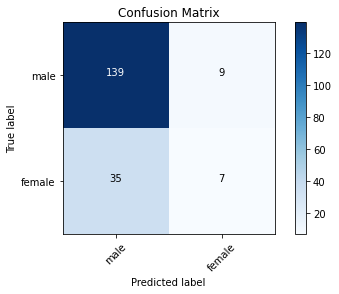

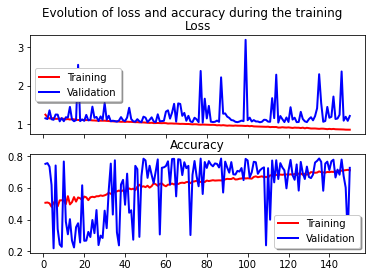

In [7]:
id='cnn_4_none_CL'
model = cnn_4(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 None CL', 'cnn_4', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 7, 500, 40)        1040      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 500, 40)        11200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 500, 40)        160       
_________________________________________________________________
activation_4 (Activation)    (None, 7, 500, 40)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 34, 40)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 7, 34, 40)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9520)             

389/389 [==============================] - 16s 41ms/step - loss: 1.1462 - accuracy: 0.5392 - AUC: 0.5699 - val_loss: 1.1866 - val_accuracy: 0.7034 - val_AUC: 0.5589
Epoch 40/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1498 - accuracy: 0.5353 - AUC: 0.5613 - val_loss: 1.0761 - val_accuracy: 0.7652 - val_AUC: 0.5234
Epoch 41/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1497 - accuracy: 0.5627 - AUC: 0.5682 - val_loss: 1.1255 - val_accuracy: 0.2282 - val_AUC: 0.5245
Epoch 42/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1562 - accuracy: 0.5439 - AUC: 0.5602 - val_loss: 1.1127 - val_accuracy: 0.6792 - val_AUC: 0.5621
Epoch 43/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1618 - accuracy: 0.5415 - AUC: 0.5608 - val_loss: 1.0851 - val_accuracy: 0.2209 - val_AUC: 0.5091
Epoch 44/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1737 - accuracy: 0.5519 - AUC: 0.5449 - val

389/389 [==============================] - 16s 41ms/step - loss: 1.0750 - accuracy: 0.5718 - AUC: 0.5981 - val_loss: 1.1526 - val_accuracy: 0.6901 - val_AUC: 0.5435
Epoch 86/150
389/389 [==============================] - 16s 41ms/step - loss: 1.1080 - accuracy: 0.5885 - AUC: 0.5811 - val_loss: 1.2214 - val_accuracy: 0.5159 - val_AUC: 0.5690
Epoch 87/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0991 - accuracy: 0.5658 - AUC: 0.5879 - val_loss: 1.3923 - val_accuracy: 0.5258 - val_AUC: 0.5535
Epoch 88/150
389/389 [==============================] - 16s 42ms/step - loss: 1.0760 - accuracy: 0.5737 - AUC: 0.6045 - val_loss: 1.1550 - val_accuracy: 0.5807 - val_AUC: 0.5806
Epoch 89/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0958 - accuracy: 0.5757 - AUC: 0.5875 - val_loss: 1.1741 - val_accuracy: 0.6224 - val_AUC: 0.5834
Epoch 90/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0803 - accuracy: 0.5686 - AUC: 0.5929 - val

Epoch 131/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0512 - accuracy: 0.5966 - AUC: 0.6120 - val_loss: 1.4918 - val_accuracy: 0.3978 - val_AUC: 0.5848
Epoch 132/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0476 - accuracy: 0.5979 - AUC: 0.6101 - val_loss: 1.2176 - val_accuracy: 0.6551 - val_AUC: 0.5845
Epoch 133/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0435 - accuracy: 0.6222 - AUC: 0.6155 - val_loss: 1.0753 - val_accuracy: 0.6700 - val_AUC: 0.5379
Epoch 134/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0466 - accuracy: 0.6237 - AUC: 0.6112 - val_loss: 1.0653 - val_accuracy: 0.7808 - val_AUC: 0.5050
Epoch 135/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0526 - accuracy: 0.5845 - AUC: 0.6016 - val_loss: 1.0679 - val_accuracy: 0.7470 - val_AUC: 0.5337
Epoch 136/150
389/389 [==============================] - 16s 41ms/step - loss: 1.0623 - accuracy: 0.5708 

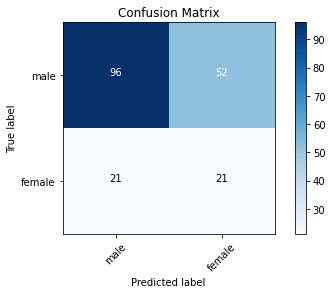

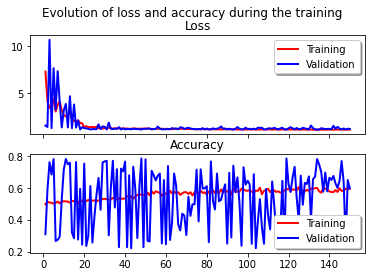

In [8]:
id='cnn_5_none_CL'
model = cnn_5(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 None CL', 'cnn_5', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

In [9]:
X_train, X_test, y_train, y_test, prop_HF = datatreat_A1(X, y, train_size=0.8, Shuffle=True, preprocess="Normalization", ratio="base", balancing_method="remove")

La proportion H/F des données d'entraînement est de 3.666666666666667
L'échantillon de training comporte 30240 frames


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 7, 500, 100)       1000      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 250, 100)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 250, 100)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 250, 100)       90100     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 125, 100)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 125, 100)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 125, 300)      

389/389 [==============================] - 27s 70ms/step - loss: 1.0885 - accuracy: 0.7028 - AUC: 0.4973 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 33/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0977 - accuracy: 0.4374 - AUC: 0.4939 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 34/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0854 - accuracy: 0.7878 - AUC: 0.4939 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 35/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0843 - accuracy: 0.7791 - AUC: 0.4959 - val_loss: 1.0996 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 36/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0948 - accuracy: 0.5081 - AUC: 0.5000 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 37/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0903 - accuracy: 0.7631 - AUC: 0.5002 - val

389/389 [==============================] - 28s 71ms/step - loss: 1.0874 - accuracy: 0.6918 - AUC: 0.4964 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 79/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0871 - accuracy: 0.6914 - AUC: 0.4994 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 80/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0885 - accuracy: 0.7682 - AUC: 0.4992 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 81/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0946 - accuracy: 0.4939 - AUC: 0.5000 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 82/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0908 - accuracy: 0.7057 - AUC: 0.5000 - val_loss: 1.0998 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 83/150
389/389 [==============================] - 27s 71ms/step - loss: 1.0823 - accuracy: 0.7895 - AUC: 0.4969 - val

Epoch 124/150
389/389 [==============================] - 27s 71ms/step - loss: 1.0869 - accuracy: 0.3825 - AUC: 0.5000 - val_loss: 1.0996 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 125/150
389/389 [==============================] - 28s 71ms/step - loss: 1.0895 - accuracy: 0.7336 - AUC: 0.5000 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 126/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0874 - accuracy: 0.7732 - AUC: 0.4988 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 127/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0856 - accuracy: 0.7866 - AUC: 0.4968 - val_loss: 1.0996 - val_accuracy: 0.2199 - val_AUC: 0.5000
Epoch 128/150
389/389 [==============================] - 27s 70ms/step - loss: 1.0811 - accuracy: 0.6920 - AUC: 0.4965 - val_loss: 1.0997 - val_accuracy: 0.7801 - val_AUC: 0.5000
Epoch 129/150
389/389 [==============================] - 27s 71ms/step - loss: 1.0844 - accuracy: 0.7883 

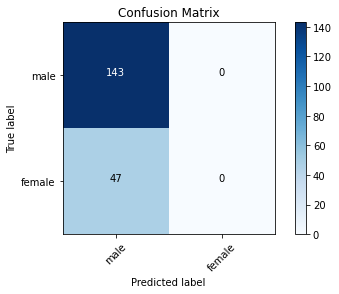

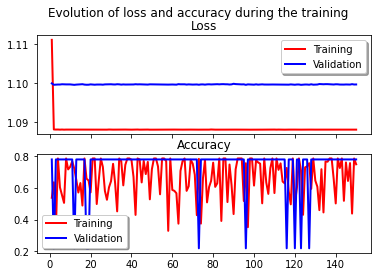

In [10]:
id='cnn_1_normalized_CL'
model = cnn_1(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Normalization CL', 'cnn_1', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 7, 500, 25)        275       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 500, 25)        4375      
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 500, 25)        100       
_________________________________________________________________
activation_6 (Activation)    (None, 7, 500, 25)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 167, 25)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 167, 25)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 167, 50)       

Epoch 29/150
389/389 [==============================] - 16s 42ms/step - loss: 1.0438 - accuracy: 0.6016 - AUC: 0.6390 - val_loss: 1.1031 - val_accuracy: 0.7130 - val_AUC: 0.6036
Epoch 30/150
389/389 [==============================] - 16s 42ms/step - loss: 1.0357 - accuracy: 0.6037 - AUC: 0.6428 - val_loss: 1.1087 - val_accuracy: 0.7183 - val_AUC: 0.6216
Epoch 31/150
389/389 [==============================] - 16s 42ms/step - loss: 1.0285 - accuracy: 0.6047 - AUC: 0.6520 - val_loss: 1.0885 - val_accuracy: 0.6594 - val_AUC: 0.6146
Epoch 32/150
389/389 [==============================] - 16s 42ms/step - loss: 1.0229 - accuracy: 0.6180 - AUC: 0.6594 - val_loss: 1.1729 - val_accuracy: 0.7533 - val_AUC: 0.6089
Epoch 33/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0244 - accuracy: 0.6143 - AUC: 0.6642 - val_loss: 1.1345 - val_accuracy: 0.7358 - val_AUC: 0.6115
Epoch 34/150
389/389 [==============================] - 17s 43ms/step - loss: 1.0175 - accuracy: 0.6207 - AUC:

389/389 [==============================] - 16s 42ms/step - loss: 0.7295 - accuracy: 0.7768 - AUC: 0.8614 - val_loss: 1.3676 - val_accuracy: 0.6815 - val_AUC: 0.5946
Epoch 76/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7226 - accuracy: 0.7797 - AUC: 0.8625 - val_loss: 1.3056 - val_accuracy: 0.6081 - val_AUC: 0.5917
Epoch 77/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7239 - accuracy: 0.7747 - AUC: 0.8624 - val_loss: 1.2999 - val_accuracy: 0.5933 - val_AUC: 0.5865
Epoch 78/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7177 - accuracy: 0.7741 - AUC: 0.8632 - val_loss: 1.3595 - val_accuracy: 0.6435 - val_AUC: 0.5867
Epoch 79/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7095 - accuracy: 0.7810 - AUC: 0.8679 - val_loss: 1.3816 - val_accuracy: 0.6389 - val_AUC: 0.5850
Epoch 80/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7066 - accuracy: 0.7819 - AUC: 0.8696 - val

Epoch 121/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4966 - accuracy: 0.8557 - AUC: 0.9376 - val_loss: 1.6089 - val_accuracy: 0.6207 - val_AUC: 0.5790
Epoch 122/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4851 - accuracy: 0.8608 - AUC: 0.9407 - val_loss: 1.6104 - val_accuracy: 0.5946 - val_AUC: 0.5722
Epoch 123/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4849 - accuracy: 0.8630 - AUC: 0.9410 - val_loss: 1.7472 - val_accuracy: 0.6425 - val_AUC: 0.5659
Epoch 124/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4952 - accuracy: 0.8573 - AUC: 0.9392 - val_loss: 1.7054 - val_accuracy: 0.6253 - val_AUC: 0.5714
Epoch 125/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4961 - accuracy: 0.8577 - AUC: 0.9384 - val_loss: 1.7145 - val_accuracy: 0.6419 - val_AUC: 0.5756
Epoch 126/150
389/389 [==============================] - 16s 42ms/step - loss: 0.4815 - accuracy: 0.8665 

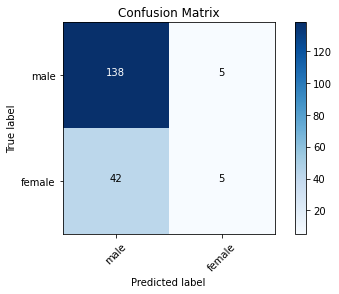

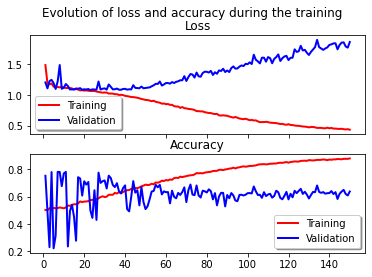

In [11]:
id='cnn_4_normalized_CL'
model = cnn_4(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Normalization CL', 'cnn_4', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 7, 500, 40)        1040      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 500, 40)        11200     
_________________________________________________________________
batch_normalization_9 (Batch (None, 7, 500, 40)        160       
_________________________________________________________________
activation_10 (Activation)   (None, 7, 500, 40)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 34, 40)         0         
_________________________________________________________________
activation_11 (Activation)   (None, 7, 34, 40)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9520)             

389/389 [==============================] - 16s 41ms/step - loss: 0.8611 - accuracy: 0.7194 - AUC: 0.7960 - val_loss: 1.3966 - val_accuracy: 0.5797 - val_AUC: 0.5533
Epoch 40/150
389/389 [==============================] - 16s 41ms/step - loss: 0.8342 - accuracy: 0.7276 - AUC: 0.8070 - val_loss: 1.4792 - val_accuracy: 0.6181 - val_AUC: 0.5442
Epoch 41/150
389/389 [==============================] - 16s 41ms/step - loss: 0.8338 - accuracy: 0.7218 - AUC: 0.8078 - val_loss: 1.4265 - val_accuracy: 0.5493 - val_AUC: 0.5470
Epoch 42/150
389/389 [==============================] - 16s 41ms/step - loss: 0.8363 - accuracy: 0.7221 - AUC: 0.8101 - val_loss: 1.4054 - val_accuracy: 0.5106 - val_AUC: 0.5506
Epoch 43/150
389/389 [==============================] - 16s 41ms/step - loss: 0.8287 - accuracy: 0.7286 - AUC: 0.8150 - val_loss: 1.5563 - val_accuracy: 0.6267 - val_AUC: 0.5385
Epoch 44/150
389/389 [==============================] - 16s 41ms/step - loss: 0.8413 - accuracy: 0.7272 - AUC: 0.8086 - val

389/389 [==============================] - 16s 41ms/step - loss: 0.7020 - accuracy: 0.7819 - AUC: 0.8720 - val_loss: 1.7029 - val_accuracy: 0.6138 - val_AUC: 0.5473
Epoch 86/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7174 - accuracy: 0.7754 - AUC: 0.8644 - val_loss: 1.7943 - val_accuracy: 0.6296 - val_AUC: 0.5458
Epoch 87/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6918 - accuracy: 0.7865 - AUC: 0.8726 - val_loss: 1.8518 - val_accuracy: 0.6326 - val_AUC: 0.5433
Epoch 88/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7085 - accuracy: 0.7810 - AUC: 0.8685 - val_loss: 1.6107 - val_accuracy: 0.5311 - val_AUC: 0.5507
Epoch 89/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7184 - accuracy: 0.7735 - AUC: 0.8654 - val_loss: 1.7245 - val_accuracy: 0.5949 - val_AUC: 0.5417
Epoch 90/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7129 - accuracy: 0.7764 - AUC: 0.8676 - val

Epoch 131/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6190 - accuracy: 0.8087 - AUC: 0.9004 - val_loss: 1.8520 - val_accuracy: 0.5499 - val_AUC: 0.5406
Epoch 132/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6312 - accuracy: 0.8023 - AUC: 0.8957 - val_loss: 1.9479 - val_accuracy: 0.6194 - val_AUC: 0.5354
Epoch 133/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6176 - accuracy: 0.8121 - AUC: 0.9017 - val_loss: 1.8959 - val_accuracy: 0.5962 - val_AUC: 0.5431
Epoch 134/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6259 - accuracy: 0.8045 - AUC: 0.8975 - val_loss: 1.9299 - val_accuracy: 0.5999 - val_AUC: 0.5343
Epoch 135/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6148 - accuracy: 0.8131 - AUC: 0.9011 - val_loss: 1.8944 - val_accuracy: 0.5995 - val_AUC: 0.5453
Epoch 136/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6195 - accuracy: 0.8117 

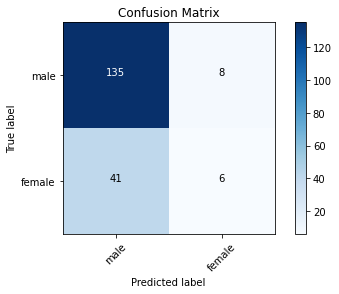

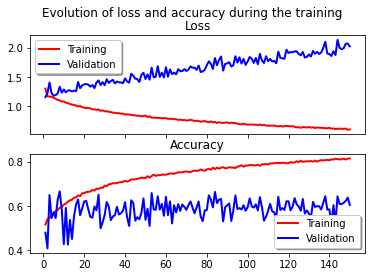

In [12]:
id='cnn_5_normalized_CL'
model = cnn_5(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Normalization CL', 'cnn_5', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

In [13]:
X_train, X_test, y_train, y_test, prop_HF = datatreat_A1(X, y, train_size=0.8, Shuffle=True, preprocess="Standardization", ratio="base", balancing_method="remove")

La proportion H/F des données d'entraînement est de 3.638036809815951
L'échantillon de training comporte 30240 frames


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 7, 500, 100)       1000      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 250, 100)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 250, 100)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 250, 100)       90100     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 125, 100)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 2, 125, 100)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 2, 125, 300)      

389/389 [==============================] - 28s 71ms/step - loss: 0.8207 - accuracy: 0.7214 - AUC: 0.8119 - val_loss: 1.5821 - val_accuracy: 0.5479 - val_AUC: 0.5332
Epoch 33/150
389/389 [==============================] - 28s 71ms/step - loss: 0.7044 - accuracy: 0.7748 - AUC: 0.8704 - val_loss: 1.9510 - val_accuracy: 0.5903 - val_AUC: 0.5319
Epoch 34/150
389/389 [==============================] - 28s 71ms/step - loss: 0.5753 - accuracy: 0.8299 - AUC: 0.9185 - val_loss: 2.4858 - val_accuracy: 0.6243 - val_AUC: 0.5390
Epoch 35/150
389/389 [==============================] - 28s 71ms/step - loss: 0.4462 - accuracy: 0.8773 - AUC: 0.9526 - val_loss: 3.5638 - val_accuracy: 0.6653 - val_AUC: 0.5376
Epoch 36/150
389/389 [==============================] - 28s 71ms/step - loss: 0.3347 - accuracy: 0.9107 - AUC: 0.9735 - val_loss: 3.8783 - val_accuracy: 0.6346 - val_AUC: 0.5303
Epoch 37/150
389/389 [==============================] - 28s 71ms/step - loss: 0.2584 - accuracy: 0.9377 - AUC: 0.9846 - val

389/389 [==============================] - 28s 71ms/step - loss: 0.0385 - accuracy: 0.9947 - AUC: 0.9990 - val_loss: 12.0291 - val_accuracy: 0.6948 - val_AUC: 0.5186
Epoch 78/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0293 - accuracy: 0.9961 - AUC: 0.9990 - val_loss: 12.7444 - val_accuracy: 0.6862 - val_AUC: 0.5191
Epoch 79/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0147 - accuracy: 0.9978 - AUC: 0.9997 - val_loss: 11.8622 - val_accuracy: 0.6918 - val_AUC: 0.5190
Epoch 80/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0301 - accuracy: 0.9963 - AUC: 0.9992 - val_loss: 15.0992 - val_accuracy: 0.7130 - val_AUC: 0.5107
Epoch 81/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0151 - accuracy: 0.9981 - AUC: 0.9995 - val_loss: 13.4553 - val_accuracy: 0.7050 - val_AUC: 0.5111
Epoch 82/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0157 - accuracy: 0.9973 - AUC: 0.9996 

389/389 [==============================] - 28s 71ms/step - loss: 0.0249 - accuracy: 0.9970 - AUC: 0.9995 - val_loss: 13.3175 - val_accuracy: 0.6981 - val_AUC: 0.5315
Epoch 123/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0176 - accuracy: 0.9970 - AUC: 0.9997 - val_loss: 13.8808 - val_accuracy: 0.7176 - val_AUC: 0.5166
Epoch 124/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0088 - accuracy: 0.9990 - AUC: 0.9997 - val_loss: 13.6196 - val_accuracy: 0.7123 - val_AUC: 0.5228
Epoch 125/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0221 - accuracy: 0.9977 - AUC: 0.9994 - val_loss: 15.7228 - val_accuracy: 0.7480 - val_AUC: 0.5069
Epoch 126/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0443 - accuracy: 0.9962 - AUC: 0.9987 - val_loss: 12.4298 - val_accuracy: 0.7133 - val_AUC: 0.5141
Epoch 127/150
389/389 [==============================] - 28s 71ms/step - loss: 0.0052 - accuracy: 0.9996 - AUC: 1.

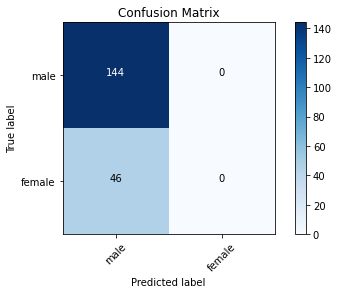

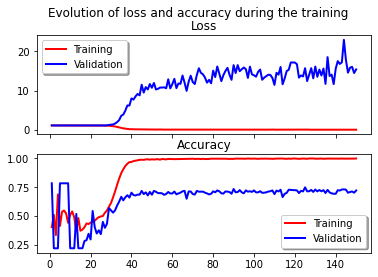

In [14]:
id='cnn_1_standardized_CL'
model = cnn_1(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Standardization CL', 'cnn_1', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 7, 500, 25)        275       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 500, 25)        4375      
_________________________________________________________________
batch_normalization_10 (Batc (None, 7, 500, 25)        100       
_________________________________________________________________
activation_12 (Activation)   (None, 7, 500, 25)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 167, 25)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 7, 167, 25)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 167, 50)       

Epoch 29/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9813 - accuracy: 0.6411 - AUC: 0.7084 - val_loss: 1.0886 - val_accuracy: 0.4845 - val_AUC: 0.6372
Epoch 30/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9512 - accuracy: 0.6590 - AUC: 0.7218 - val_loss: 1.0604 - val_accuracy: 0.5327 - val_AUC: 0.6464
Epoch 31/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9531 - accuracy: 0.6599 - AUC: 0.7283 - val_loss: 1.0704 - val_accuracy: 0.6396 - val_AUC: 0.6397
Epoch 32/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9578 - accuracy: 0.6607 - AUC: 0.7219 - val_loss: 1.0999 - val_accuracy: 0.4884 - val_AUC: 0.6425
Epoch 33/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9520 - accuracy: 0.6601 - AUC: 0.7324 - val_loss: 1.0807 - val_accuracy: 0.5807 - val_AUC: 0.6363
Epoch 34/150
389/389 [==============================] - 16s 42ms/step - loss: 0.9462 - accuracy: 0.6672 - AUC:

389/389 [==============================] - 16s 42ms/step - loss: 0.6589 - accuracy: 0.7984 - AUC: 0.8868 - val_loss: 1.2485 - val_accuracy: 0.5853 - val_AUC: 0.6375
Epoch 76/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6628 - accuracy: 0.7992 - AUC: 0.8850 - val_loss: 1.2587 - val_accuracy: 0.5741 - val_AUC: 0.6340
Epoch 77/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6490 - accuracy: 0.8033 - AUC: 0.8925 - val_loss: 1.2789 - val_accuracy: 0.5926 - val_AUC: 0.6327
Epoch 78/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6519 - accuracy: 0.8013 - AUC: 0.8895 - val_loss: 1.2622 - val_accuracy: 0.5797 - val_AUC: 0.6304
Epoch 79/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6525 - accuracy: 0.7991 - AUC: 0.8902 - val_loss: 1.2508 - val_accuracy: 0.5671 - val_AUC: 0.6331
Epoch 80/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6477 - accuracy: 0.8001 - AUC: 0.8924 - val

Epoch 121/150
389/389 [==============================] - 17s 43ms/step - loss: 0.5024 - accuracy: 0.8552 - AUC: 0.9366 - val_loss: 1.5212 - val_accuracy: 0.5985 - val_AUC: 0.6219
Epoch 122/150
389/389 [==============================] - 17s 43ms/step - loss: 0.4912 - accuracy: 0.8590 - AUC: 0.9388 - val_loss: 1.5210 - val_accuracy: 0.6429 - val_AUC: 0.6285
Epoch 123/150
389/389 [==============================] - 17s 43ms/step - loss: 0.4804 - accuracy: 0.8630 - AUC: 0.9417 - val_loss: 1.5021 - val_accuracy: 0.5942 - val_AUC: 0.6261
Epoch 124/150
389/389 [==============================] - 17s 43ms/step - loss: 0.4919 - accuracy: 0.8586 - AUC: 0.9394 - val_loss: 1.5080 - val_accuracy: 0.6409 - val_AUC: 0.6266
Epoch 125/150
389/389 [==============================] - 17s 43ms/step - loss: 0.4932 - accuracy: 0.8596 - AUC: 0.9389 - val_loss: 1.4688 - val_accuracy: 0.6177 - val_AUC: 0.6325
Epoch 126/150
389/389 [==============================] - 17s 43ms/step - loss: 0.4829 - accuracy: 0.8612 

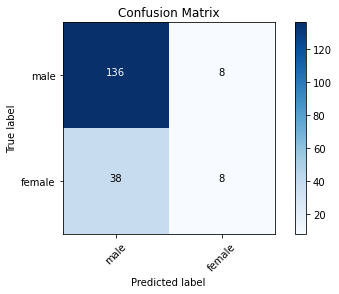

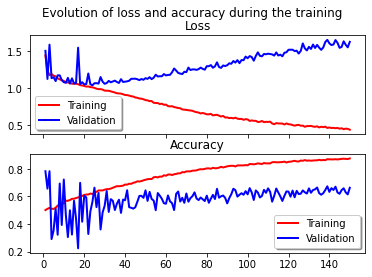

In [15]:
id='cnn_4_standardized_CL'
model = cnn_4(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Standardization CL', 'cnn_4', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 7, 500, 40)        1040      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 500, 40)        11200     
_________________________________________________________________
batch_normalization_14 (Batc (None, 7, 500, 40)        160       
_________________________________________________________________
activation_16 (Activation)   (None, 7, 500, 40)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 34, 40)         0         
_________________________________________________________________
activation_17 (Activation)   (None, 7, 34, 40)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9520)             

389/389 [==============================] - 16s 41ms/step - loss: 0.7960 - accuracy: 0.7485 - AUC: 0.8300 - val_loss: 1.4397 - val_accuracy: 0.6088 - val_AUC: 0.5903
Epoch 40/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7793 - accuracy: 0.7510 - AUC: 0.8380 - val_loss: 1.5184 - val_accuracy: 0.6577 - val_AUC: 0.5895
Epoch 41/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7839 - accuracy: 0.7506 - AUC: 0.8333 - val_loss: 1.3840 - val_accuracy: 0.5959 - val_AUC: 0.5871
Epoch 42/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7893 - accuracy: 0.7459 - AUC: 0.8349 - val_loss: 1.5429 - val_accuracy: 0.5929 - val_AUC: 0.5851
Epoch 43/150
389/389 [==============================] - 16s 41ms/step - loss: 0.7802 - accuracy: 0.7511 - AUC: 0.8349 - val_loss: 1.3589 - val_accuracy: 0.5711 - val_AUC: 0.5985
Epoch 44/150
389/389 [==============================] - 16s 42ms/step - loss: 0.7744 - accuracy: 0.7464 - AUC: 0.8394 - val

389/389 [==============================] - 16s 42ms/step - loss: 0.6461 - accuracy: 0.7997 - AUC: 0.8911 - val_loss: 1.7133 - val_accuracy: 0.6012 - val_AUC: 0.5755
Epoch 86/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6386 - accuracy: 0.8041 - AUC: 0.8947 - val_loss: 1.7339 - val_accuracy: 0.6392 - val_AUC: 0.5788
Epoch 87/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6481 - accuracy: 0.8015 - AUC: 0.8910 - val_loss: 1.7869 - val_accuracy: 0.6210 - val_AUC: 0.5878
Epoch 88/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6354 - accuracy: 0.8062 - AUC: 0.8950 - val_loss: 1.7243 - val_accuracy: 0.6058 - val_AUC: 0.5806
Epoch 89/150
389/389 [==============================] - 16s 41ms/step - loss: 0.6323 - accuracy: 0.8030 - AUC: 0.8953 - val_loss: 1.8451 - val_accuracy: 0.6442 - val_AUC: 0.5795
Epoch 90/150
389/389 [==============================] - 16s 42ms/step - loss: 0.6376 - accuracy: 0.8084 - AUC: 0.8931 - val

Epoch 131/150
389/389 [==============================] - 16s 41ms/step - loss: 0.5389 - accuracy: 0.8426 - AUC: 0.9248 - val_loss: 1.9728 - val_accuracy: 0.6243 - val_AUC: 0.5754
Epoch 132/150
389/389 [==============================] - 16s 41ms/step - loss: 0.5495 - accuracy: 0.8365 - AUC: 0.9231 - val_loss: 1.9991 - val_accuracy: 0.6458 - val_AUC: 0.5730
Epoch 133/150
389/389 [==============================] - 16s 42ms/step - loss: 0.5425 - accuracy: 0.8396 - AUC: 0.9235 - val_loss: 2.0163 - val_accuracy: 0.6551 - val_AUC: 0.5826
Epoch 134/150
389/389 [==============================] - 16s 41ms/step - loss: 0.5667 - accuracy: 0.8271 - AUC: 0.9171 - val_loss: 1.9662 - val_accuracy: 0.6306 - val_AUC: 0.5777
Epoch 135/150
389/389 [==============================] - 16s 42ms/step - loss: 0.5576 - accuracy: 0.8323 - AUC: 0.9189 - val_loss: 2.0043 - val_accuracy: 0.6442 - val_AUC: 0.5761
Epoch 136/150
389/389 [==============================] - 16s 42ms/step - loss: 0.5619 - accuracy: 0.8327 

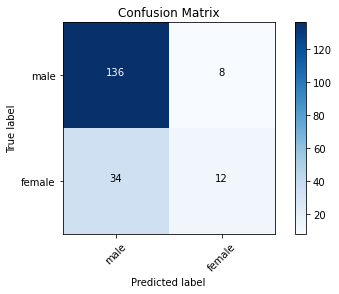

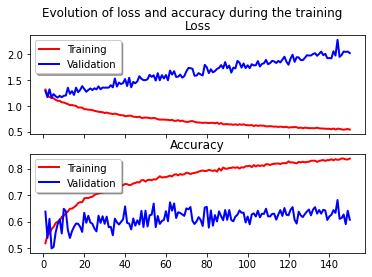

In [16]:
id='cnn_5_standardized_CL'
model = cnn_5(loss=loss_generator(prop_HF))
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
accuracy, roc, f1_macro, f1_wei = test_1(model, X_test, y_test, id)
save_results(id, 'datatreat_A1 Standardization CL', 'cnn_5', epochs, batch_size, accuracy, roc, f1_macro, f1_wei, validation_split)
plot_loss_acc_history(history, id, validation_split)